In [1]:
import sys, os, cv2
module_rootdir = '../../..'
dataset_rootdir = '../../../../'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.bdd_dataset_utils.remapped_bdd_utils import load_ground_truths
from modules.augmentation.lib.geometric_transform import (
    resize_with_padding, random_perspective, geometric_transform_bbox,
    flip_image, resize_with_warping, scaled_random_crop)
from modules.plot.viz_annotation import draw_bbox_on_img_data

In [2]:
sel_train_labels_file = config_dataset.bdd_sel_train_labels_file
train_images_dir = config_dataset.bdd_train_images_dir

selected_labels = load_ground_truths(
    label_rootdir,
    sel_train_labels_file, 
    dataset_rootdir,
    train_images_dir, 
    verbose=True)

Load JSON file .. please wait
annotations from 1/69863 aggregated
annotations from 2001/69863 aggregated
annotations from 4001/69863 aggregated
annotations from 6001/69863 aggregated
annotations from 8001/69863 aggregated
annotations from 10001/69863 aggregated
annotations from 12001/69863 aggregated
annotations from 14001/69863 aggregated
annotations from 16001/69863 aggregated
annotations from 18001/69863 aggregated
annotations from 20001/69863 aggregated
annotations from 22001/69863 aggregated
annotations from 24001/69863 aggregated
annotations from 26001/69863 aggregated
annotations from 28001/69863 aggregated
annotations from 30001/69863 aggregated
annotations from 32001/69863 aggregated
annotations from 34001/69863 aggregated
annotations from 36001/69863 aggregated
annotations from 38001/69863 aggregated
annotations from 40001/69863 aggregated
annotations from 42001/69863 aggregated
annotations from 44001/69863 aggregated
annotations from 46001/69863 aggregated
annotations from 4

## Random Cropping

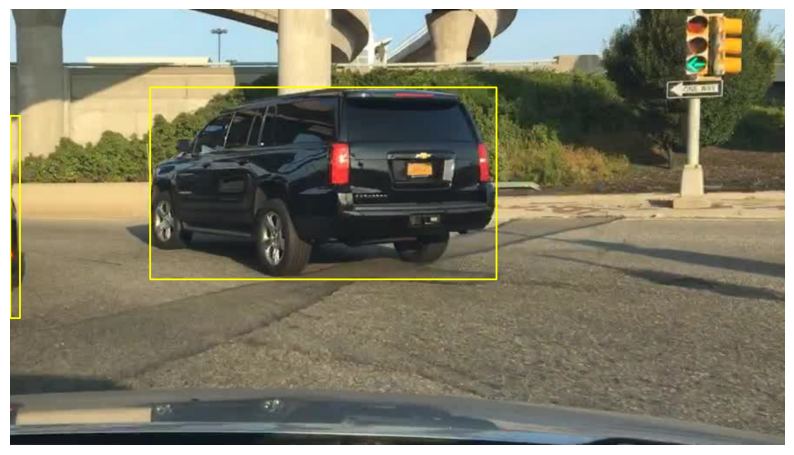

[[  0.       176.82278   16.865496 510.8797  ]
 [231.1822   129.86842  803.3823   446.19263 ]]
----------------------------------------------------------------------------------------------------


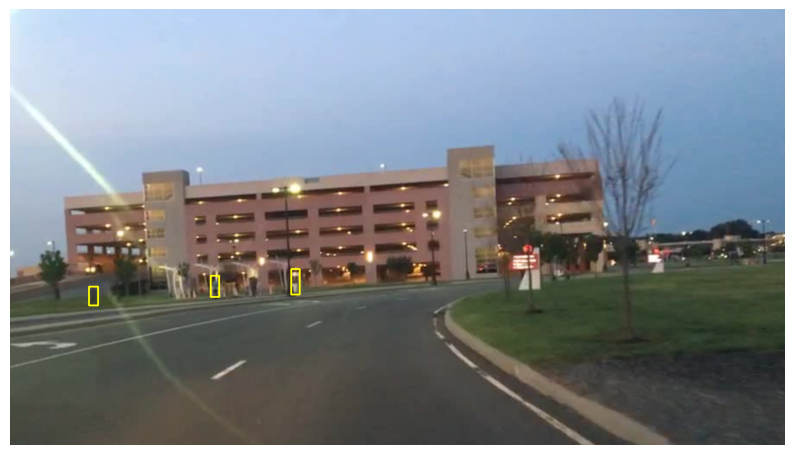

[[130.227   458.39804 145.96649 489.9396 ]
 [331.3426  440.87497 345.33325 475.92114]
 [464.2538  429.19293 478.24445 471.24835]]
----------------------------------------------------------------------------------------------------


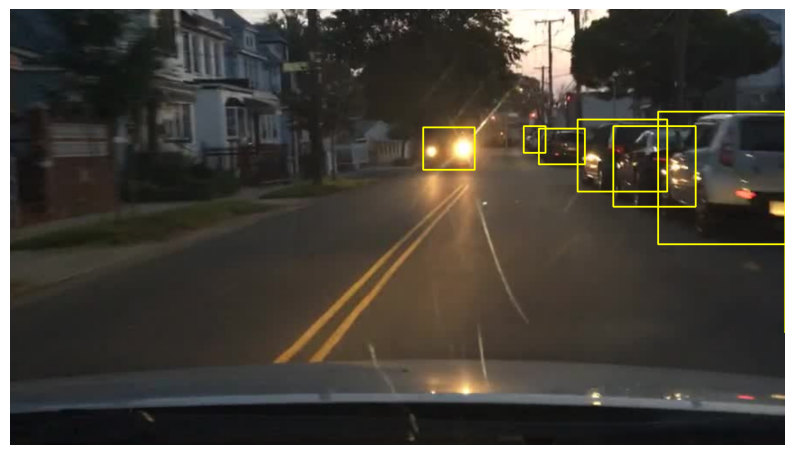

[[ 682.7689   195.18852  767.5996   265.31296]
 [ 848.1886   193.06355  884.2417   237.68819]
 [ 873.6378   197.31349  949.9854   256.813  ]
 [ 937.2608   182.43861 1085.7145   301.43762]
 [ 996.6423   193.06355 1132.3713   326.93744]
 [1070.4451   169.68875 1280.       388.56192]
 [1280.       194.76353 1280.       534.76074]]
----------------------------------------------------------------------------------------------------


In [3]:
for i in range(3):
    img_path = selected_labels[i]['img_path']
    objCategoryid = selected_labels[i]['objCategoryid']
    boundingBox2D = selected_labels[i]['boundingBox2D'].copy()

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    new_img, bboxes = scaled_random_crop(
        img=image_rgb, 
        bboxes=boundingBox2D, 
        scale=0.7)

    draw_bbox_on_img_data(new_img, bboxes, figsize=(10,8))
    print(bboxes)
    print('-' * 100)

## Resize with padding

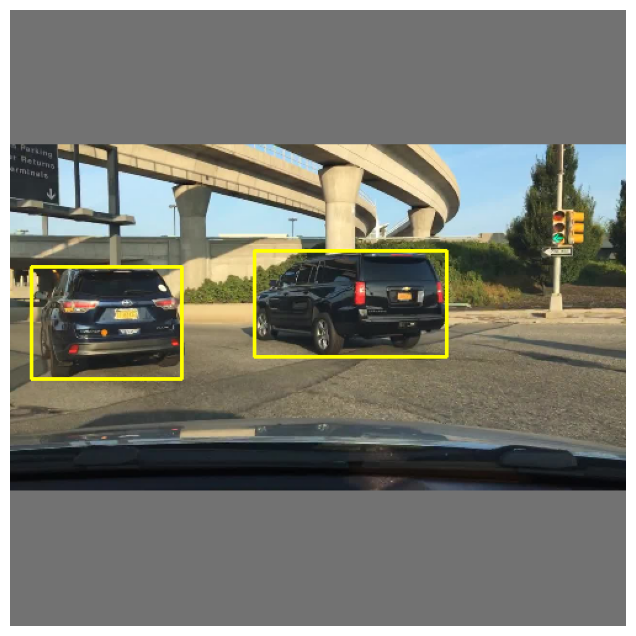

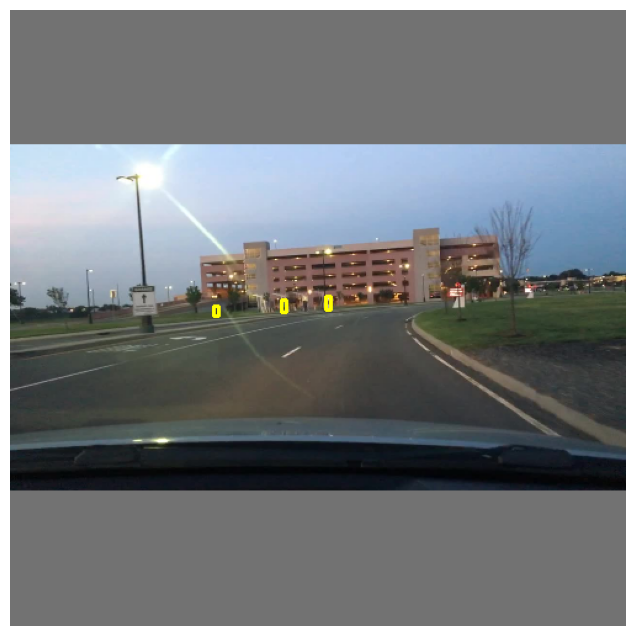

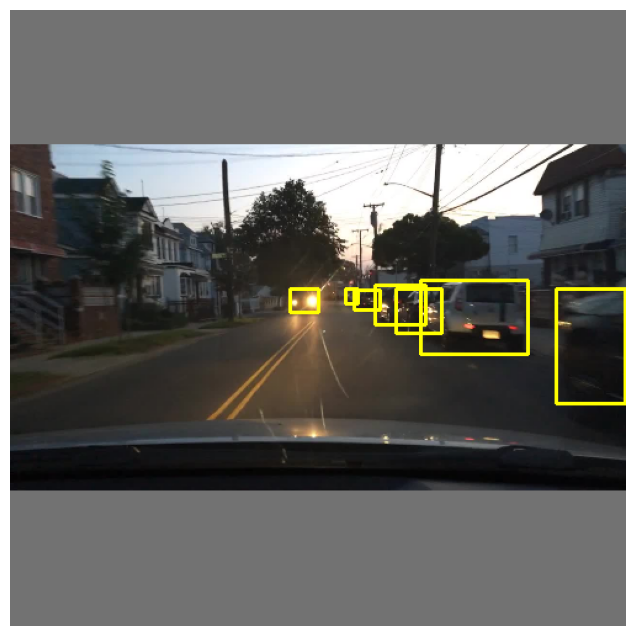

In [4]:
img_new_h = 500
img_new_w = 500

for i in range(3):
    img_path = selected_labels[i]['img_path']
    objCategoryid = selected_labels[i]['objCategoryid']
    boundingBox2D = selected_labels[i]['boundingBox2D'].copy()

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    new_img, bboxes = resize_with_padding(
        img=image_rgb, 
        bboxes=boundingBox2D, 
        img_h=img_new_h, 
        img_w=img_new_w)
    draw_bbox_on_img_data(new_img, bboxes, figsize=(10,8))

## Resize with warping

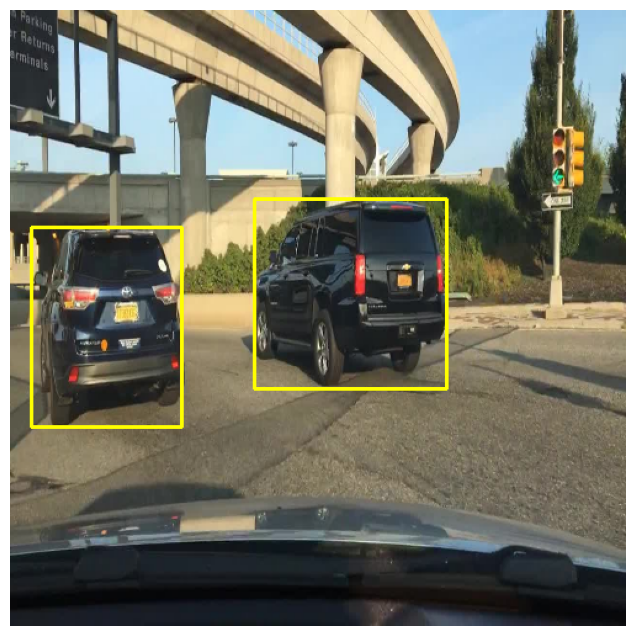

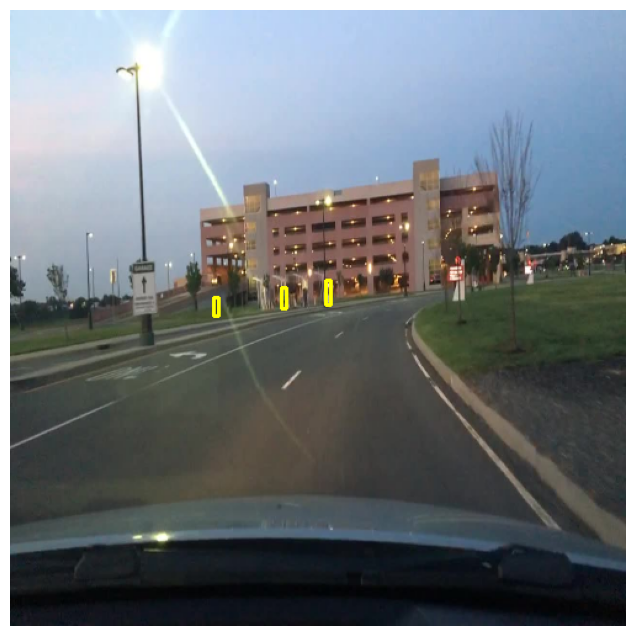

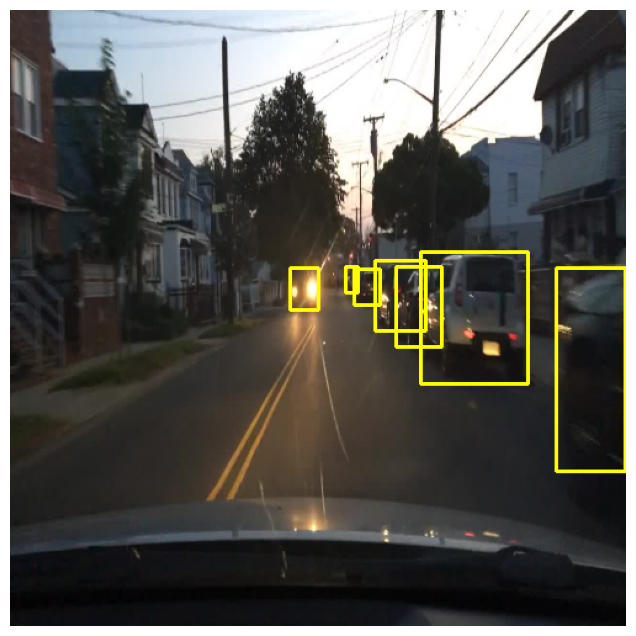

In [5]:
img_new_h = 500
img_new_w = 500

for i in range(3):
    img_path = selected_labels[i]['img_path']
    objCategoryid = selected_labels[i]['objCategoryid']
    boundingBox2D = selected_labels[i]['boundingBox2D'].copy()

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    new_img, bboxes = resize_with_warping(
        img=image_rgb, 
        bboxes=boundingBox2D, 
        img_h=img_new_h, 
        img_w=img_new_w)
    draw_bbox_on_img_data(new_img, bboxes, figsize=(10,8))

## Horizontally Flip Image

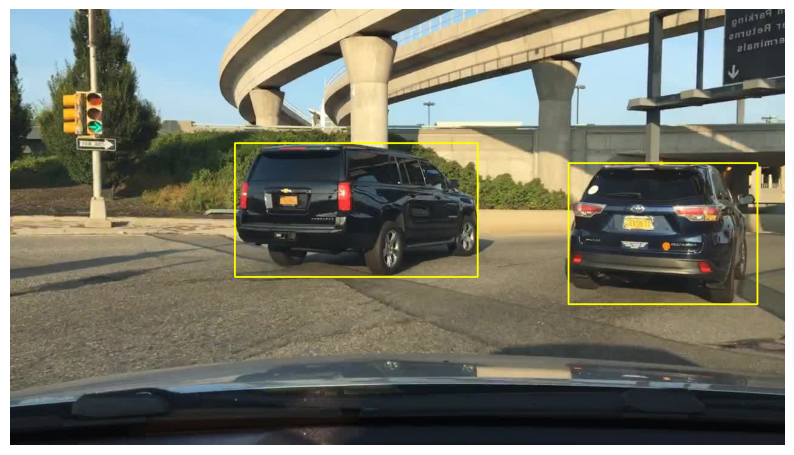

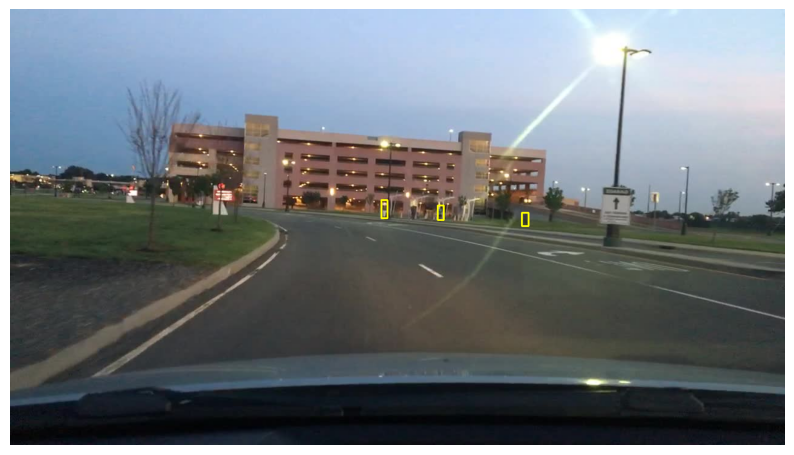

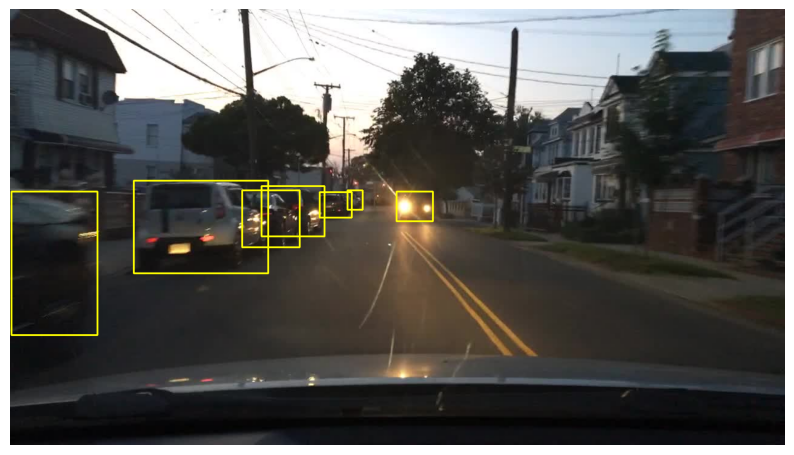

In [6]:
for i in range(3):
    img_path = selected_labels[i]['img_path']
    objCategoryid = selected_labels[i]['objCategoryid']
    boundingBox2D = selected_labels[i]['boundingBox2D'].copy()

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    new_img, bboxes = flip_image(
        image=image_rgb, 
        bboxes=boundingBox2D)
    draw_bbox_on_img_data(new_img, bboxes, figsize=(10,8))

## Random Perspective Transform

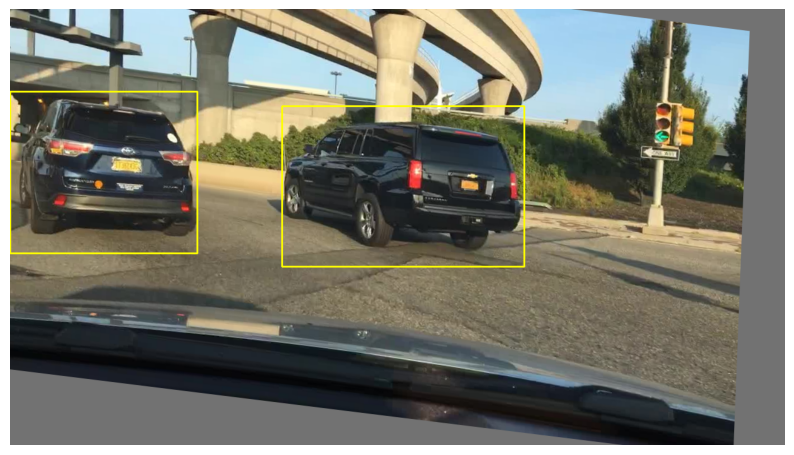

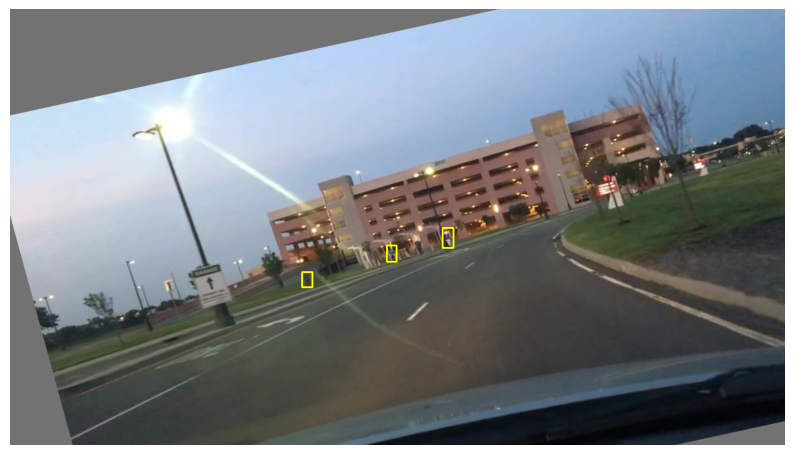

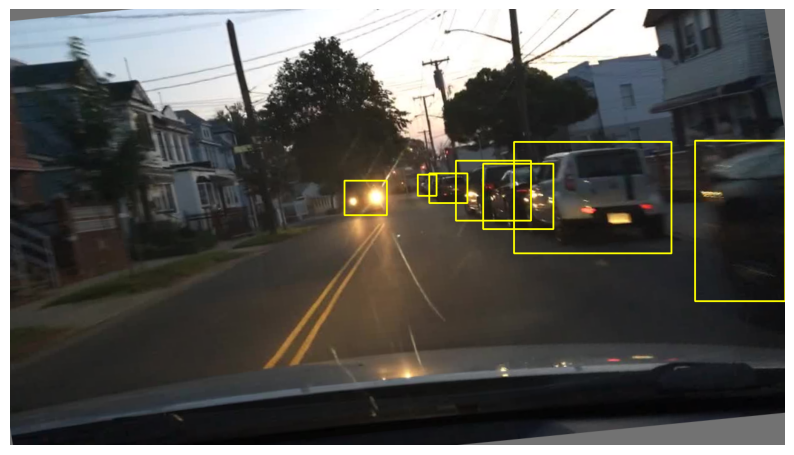

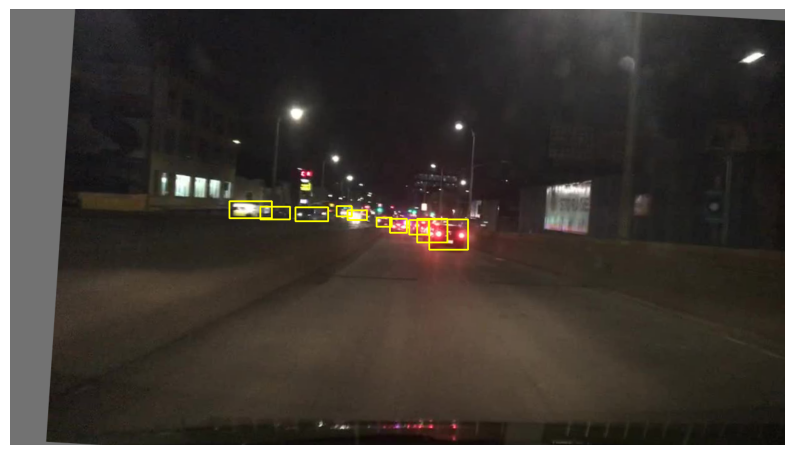

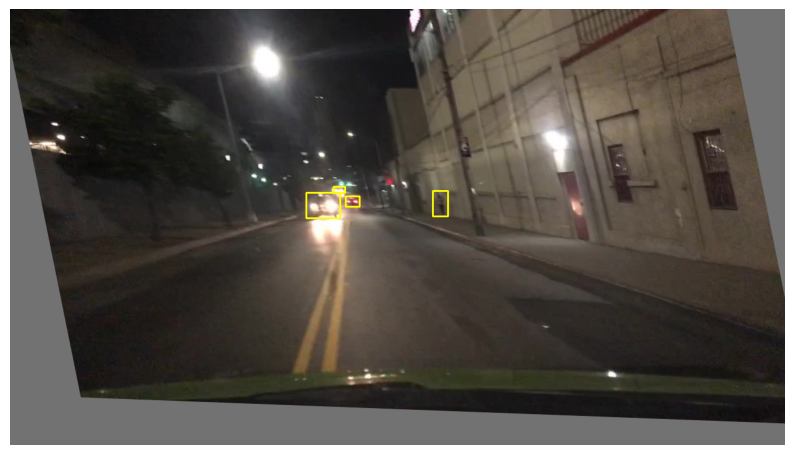

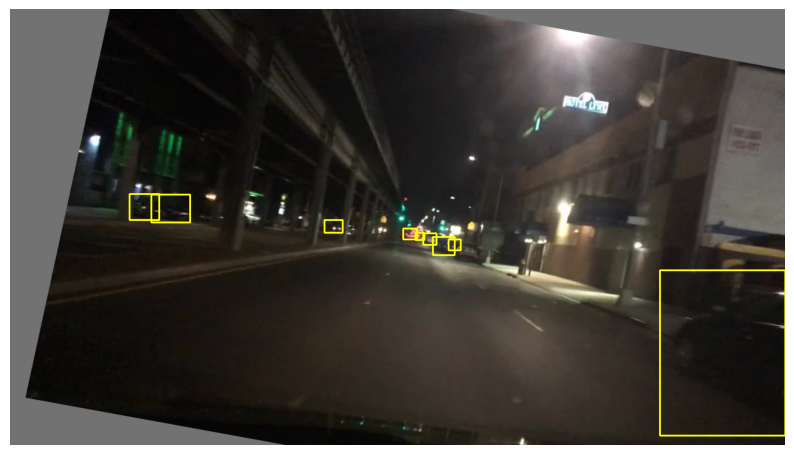

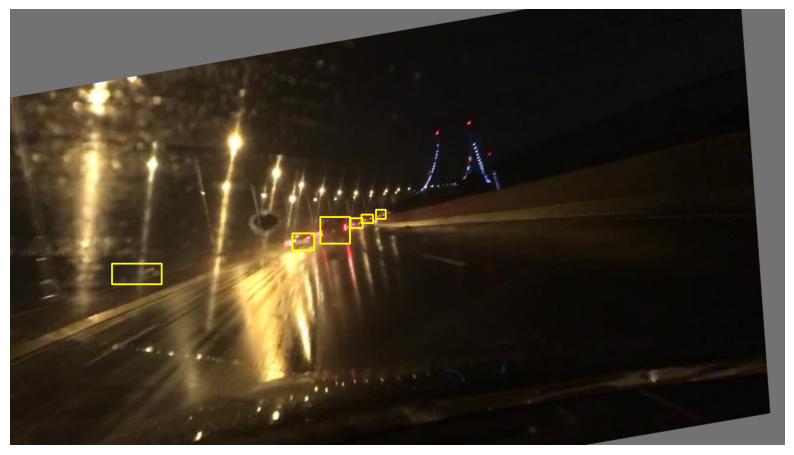

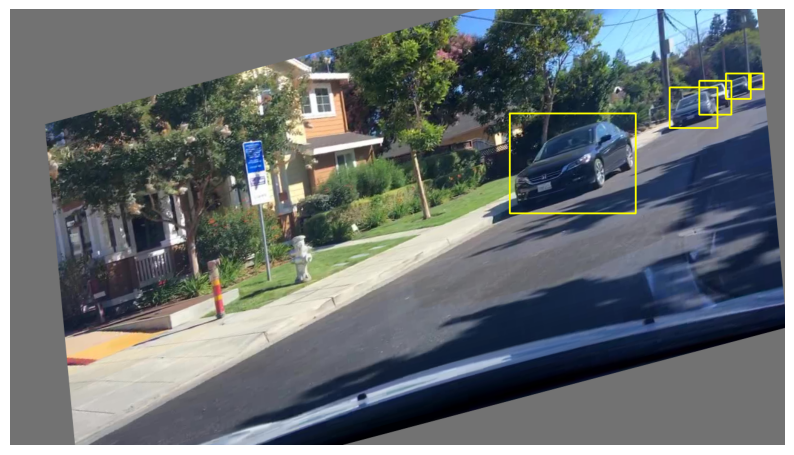

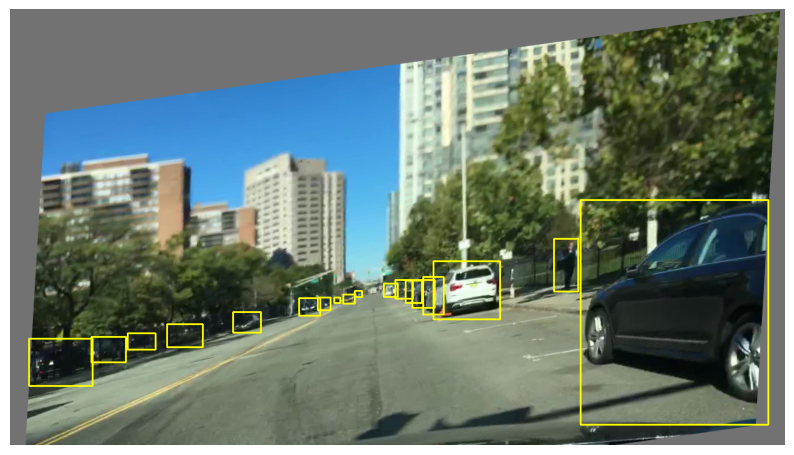

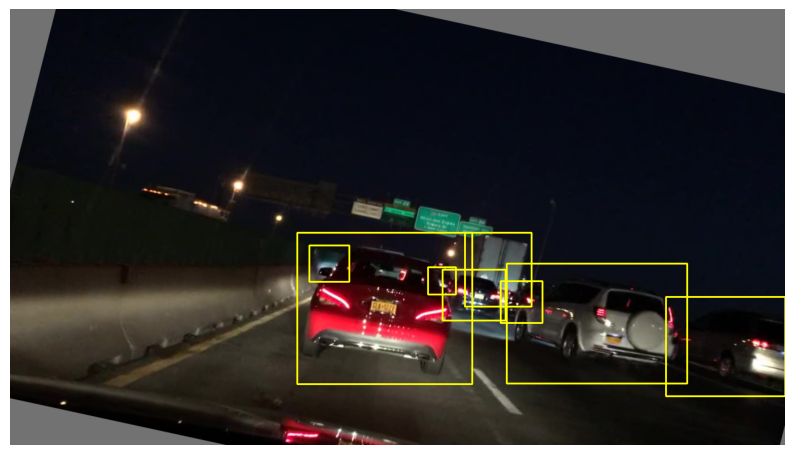

In [7]:
for i in range(10):
    img_path = selected_labels[i]['img_path']
    objCategoryid = selected_labels[i]['objCategoryid']
    boundingBox2D = selected_labels[i]['boundingBox2D'].copy()

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    new_img, T, height, width = random_perspective(image_rgb)
    bboxes = geometric_transform_bbox(boundingBox2D, T, height, width)
    draw_bbox_on_img_data(new_img, bboxes, figsize=(10,8))

